In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Printing the columns of the dataset, as well as their types. This is an important step because depending of the type of 
data that we have, the treatment that we have to perform differs.

In [4]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
data.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


The relation among neighbourhood group, room type and price give a geneneral idea about the data. 

In [7]:
data.drop(columns=['id', 'name', 'host_id', 'host_name'], inplace=True)

Text(0.5, 0, 'neighbourhood group')

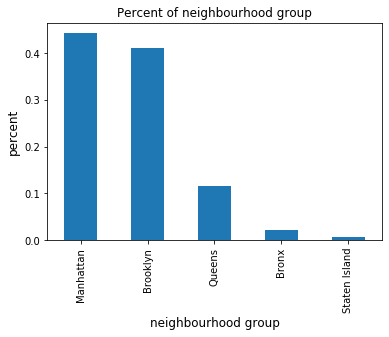

In [8]:
#visualize the categorical values for the neighbourhood_group
plt.figure(figsize=(6,4))
count_neigh = data.neighbourhood_group.value_counts()
(count_neigh/data.shape[0]).plot(kind='bar');
plt.title('Percent of neighbourhood group', fontsize = 12)
plt.ylabel('percent', fontsize = 12)
plt.xlabel('neighbourhood group', fontsize = 12)

In the listed neighborhood group the amount of business in Manhattan is largest and in Staten Island is the smallest. This is expected because in Manhattan and Brooklyn the amount of tourist is higher than the other because of their diiferent attarction of tourists in the area. 

Text(0, 0.5, 'the percent of every room type')

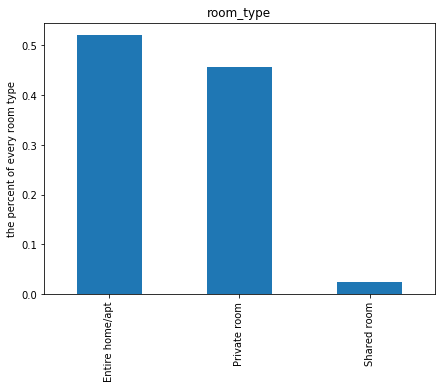

In [9]:
#visualize the categorical values for the room_type
plt.figure(figsize=(7,5))
count_room = data.room_type.value_counts()
(count_room/data.shape[0]).plot(kind='bar');
plt.title('room_type')
plt.ylabel('the percent of every room type')

This variable is an indication of the human prefence with the nature of house and status of privacy. In all nighborhood the amount of people serving in home/apartment and private room is higher than shared room. Shared room business in this specific area is generally not significance. 

<Figure size 864x864 with 0 Axes>

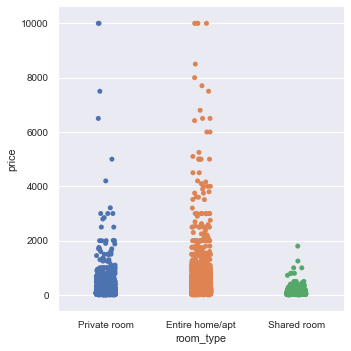

In [10]:
# reference: https://seaborn.pydata.org/generated/seaborn.catplot.html
plt.figure(figsize=(12,12))
sns.set_context("paper")
sns.set(style="darkgrid", font_scale=.9)
sns.catplot(x="room_type", y="price", data=data);

In [11]:
data.groupby('room_type')[['price','number_of_reviews']].mean()

,price,number_of_reviews
room_type,,
Entire home/apt,211.794246,22.842418
Private room,89.780973,24.112962
Shared room,70.127586,16.600000


The Entire rooms/apartments cost are more than just a shared room, where as the differece in price of a shared room and a private one is about 20 dollars. In contrast, the number of viewrs are higher in private room than the other. This small price differece between private room and shared room may lead to prefer the private room. 


The overall price in the entire home is more expensive than the others. The price of the shared price is lower than the others. 

In [12]:
def plot_price_wrt_room_type(data,title):
    data2 = data.pivot(columns='room_type',values='price')
    x1=list(data2[data2.columns[0]])
    x2=list(data2[data2.columns[1]])
    x3=list(data2[data2.columns[2]])

    plt.figure(figsize=(8, 6))
    plt.rc('legend',**{'fontsize':12})
    plt.legend(fontsize=15)
    plt.rcParams['figure.figsize']=(15,8)
    plt.style.use(style='ggplot')
    plt.tick_params(labelsize=12)
    plt.tick_params(labelsize=12)
    plt.ylabel("Count",fontsize=12,color='black')
    plt.xlabel("Price",fontsize=12,color='black')
    plt.title(title,fontsize=12,color='black')
    plt.legend(prop={'size': 10}) 
    n_bins=12
    colors = ['orange', 'aqua', 'green']
    labels=[data2.columns[0],data2.columns[1],data2.columns[2]]
    plt.hist([x1, x2, x3], n_bins, histtype='bar', 
             color=colors, range=[0,300],label=labels,alpha=1)
         
    plt.legend(loc="upper right")
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


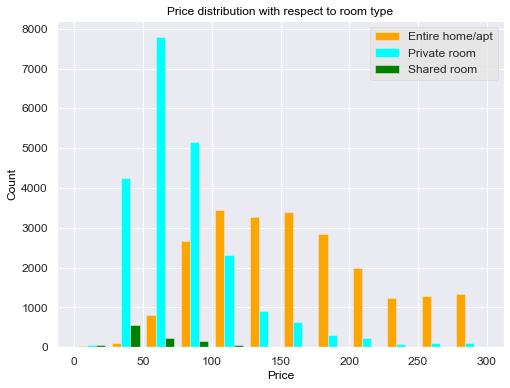

In [13]:
title='Price distribution with respect to room type'
plot_price_wrt_room_type(data,title)

Price distribution with room type is an indicator for the preference of the business by the customer. Hence, the graph indicates guests more prefer the private room and which it's price is relatively under the average of the others. 

In [14]:
def plot_price_wrt_neigbourhood_group(data,title):
    data2 = data.pivot(columns='neighbourhood_group',values='price')
    x1=list(data2[data2.columns[0]])
    x2=list(data2[data2.columns[1]])
    x3=list(data2[data2.columns[2]])
    x4=list(data2[data2.columns[3]])
    x5=list(data2[data2.columns[4]])

    plt.figure(figsize=(9, 7))
    plt.style.use(style='ggplot')
    plt.rc('legend',**{'fontsize':12})
    plt.tick_params(labelsize=25) 
    plt.legend(fontsize=20)
    plt.rcParams['figure.figsize']=(15,8)       
    plt.ylabel("Count",fontsize=12,color='black')
    plt.xlabel("Price",fontsize=12,color='black')
    plt.title(title,fontsize=12,color='black')
    plt.legend(prop={'size': 8}) 
    plt.tick_params(labelsize=12)
    n_bins=12
    colors = ['yellow', 'red', 'green', 'black', 'blue']
    labels=[data2.columns[0],data2.columns[1],data2.columns[2], data2.columns[3], data2.columns[4]]
    plt.hist([x1, x2, x3, x4, x5], n_bins, histtype='bar', 
             color=colors, range=[0,400],label=labels,alpha=1)
         
    plt.legend(loc="upper right")
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


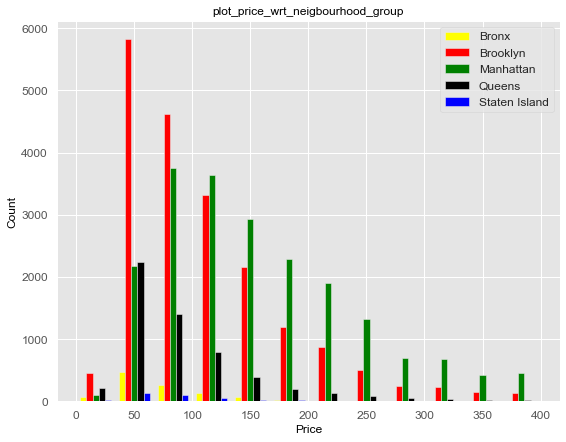

In [15]:
title='plot_price_wrt_neigbourhood_group'
plot_price_wrt_neigbourhood_group(data,title)

Neighbourhood Manhattan has highest price with high demand.The area is highly visited by the investor and having high demand and high price is expected.

In [16]:
#plt.subplot2grid((2,3), (0,0))
#data.room_type[data.neighbourhood_group == "..... "].value_counts(normalize = True).plot(kind = "bar", alpha= 0.5)
#plt.title("room_type with neigbourhood_group")

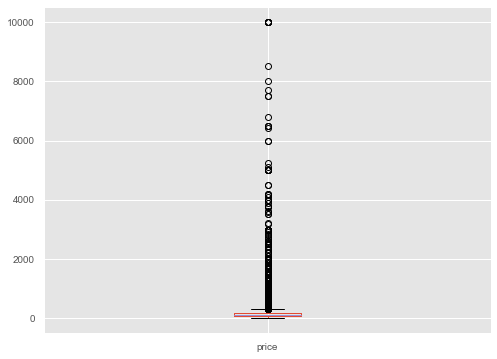

In [17]:
plt.figure(figsize=(8,6))
data.boxplot(column='price', return_type='axes')  
plt.show()

This plot indicates the overall price distribution. The plot indicates the majority of the record is above the average price.

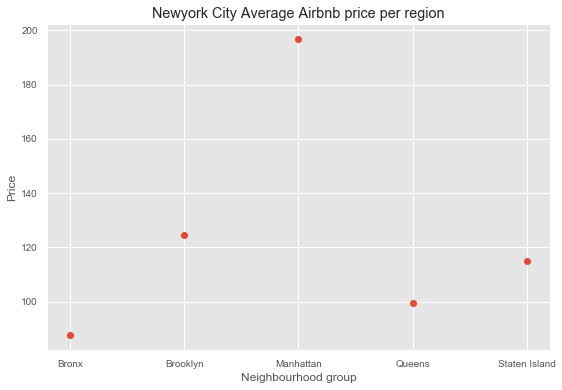

In [18]:
plt.figure(figsize = (9, 6))
plt.plot(data.groupby(['neighbourhood_group'])['price'].mean().keys(),data.groupby(['neighbourhood_group'])['price'].mean().values,'o')
plt.title('Newyork City Average Airbnb price per region')
plt.ylabel('Price')
plt.xlabel('Neighbourhood group')
color = ['DarkBlue']
plt.show()


As we see that the average price in Manhattan is higher than in other regions. Manhattan is the most populated of Newyork City. it is among the world's major commerical, financial and cultural ceters. because of this the area has high tourists. 

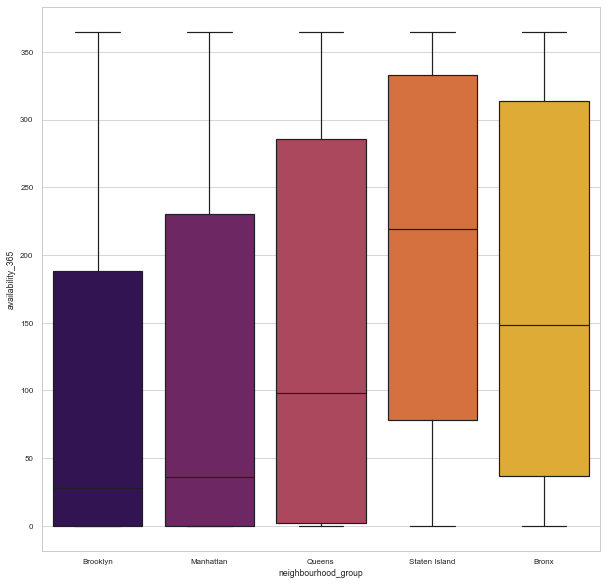

In [19]:
#boxplot neighbourhood_group and room availability
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9) 
plt.figure(figsize=(10,10))                                                           
plt.tight_layout()                                                                    
                                               
sns.despine(left=True, bottom=True)                                                   
plt.savefig('test.pdf', bbox_inches='tight') 
df1 = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365',palette='inferno')



Availability of one the key aprameter for this business and for anyother business. As the plot indicates there is a no enough supply for all neighborhood group for 365 days. 

### Neighbourhood gorup colored by price

In [20]:
# reference: https://plot.ly/python/line-and-scatter/
regions_dict = {value: i for i,value in enumerate(data.neighbourhood_group.unique())}
reverse_regions_dict = {i:v for v,i in regions_dict.items()}
data = data.applymap(lambda s: regions_dict.get(s) if s in regions_dict.keys() else s)

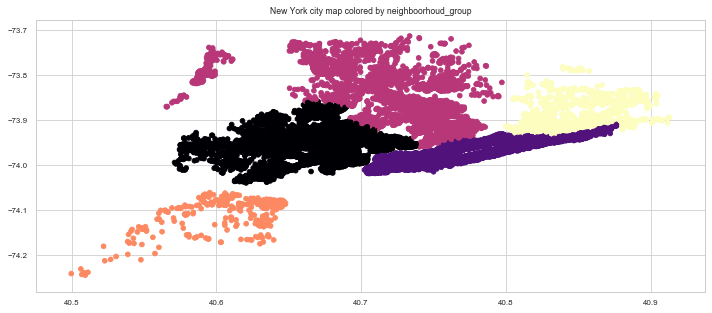

In [21]:
# reference: https://plot.ly/python/line-and-scatter/
plt.figure(figsize=(12, 5))
plt.scatter(data.latitude,data.longitude, c = data.neighbourhood_group,cmap='magma')
plt.title('New York city map colored by neighboorhoud_group')
#plt.legend()
plt.show()

This graph is inlustrates another quantitative variables(longitude and latitude) with neighborhood group. 

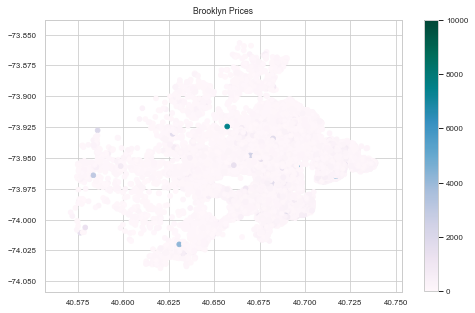

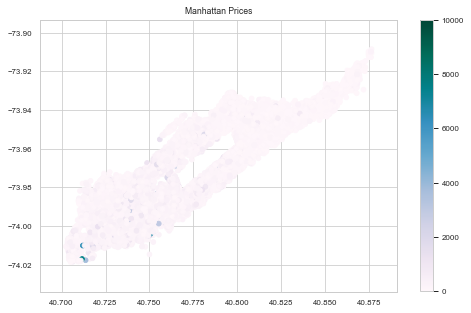

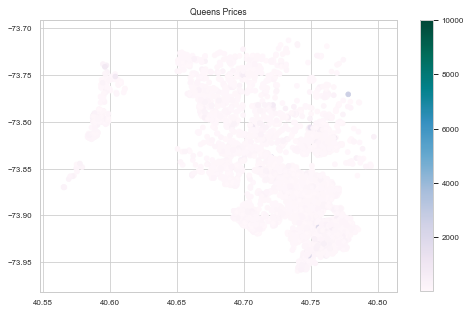

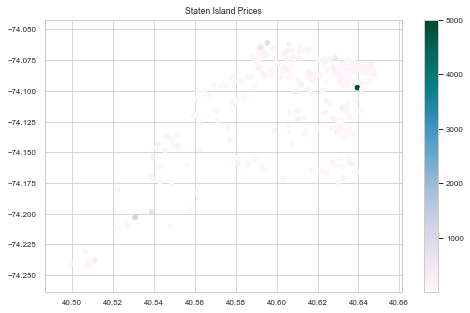

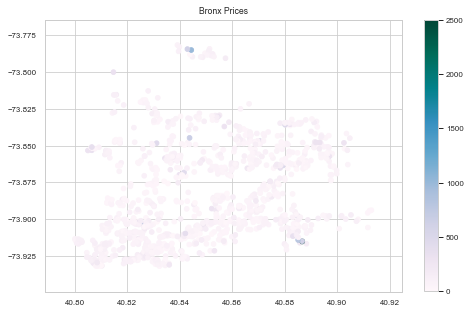

In [22]:

for i,region in enumerate(data.groupby(['neighbourhood_group'])['price'].mean().keys()):
    NY_data  = data[data.neighbourhood_group == region]
    plt.figure(figsize=(8, 5))
    # xxx, sub = plt.subplots(1, 2)
    plt.scatter(NY_data.latitude, NY_data.longitude, c = NY_data.price,cmap='PuBuGn')
    plt.title('{} Prices'.format(reverse_regions_dict[region]))
    plt.colorbar()
    plt.show()

When we look at the amount of owners per region, it is interesting to notice that in the regions where the rent price is
higher, the number of owners is also higher. That is probably due to the fact that as the apartments cost more in such regions
is harder to find owners of two or more houses there.

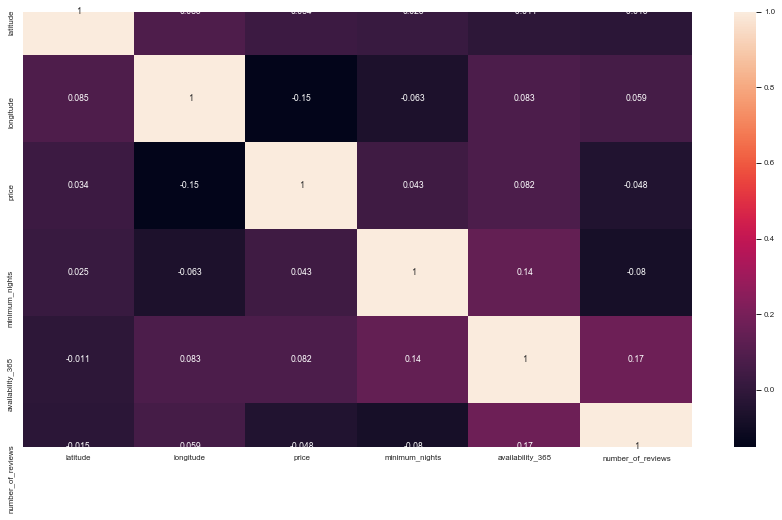

In [23]:
sns.heatmap(data[['latitude','longitude','price','minimum_nights','availability_365','number_of_reviews']].corr(),annot=True)
plt.show()

As seen in the correlation matrix, homes that are more available tend to have more reviews, which is natural,
since as the place is avaliable more days in a year more people can rent it.